## NLP, 텍스트 분석

구분을 굳이 할 필요는 없음.
둘 다 기존 룰 기반에서 ML 기반으로 변함
- NLP: 머신이 인간의 언어를 이해하고 해석하는 데 중점
    - 기계 번역, QA 등
- TA: 비정형 텍스트에서 의미 있는 정보 추출하는 데 중점
    - 텍스트 분류
    - 감성 분석
    - 텍스트 요약
    - 텍스트 군집화와 유사도 측정: 비지도 학습



# 텍스트 분석 이해

비정형 데이터인 텍스트를 머신러닝에 적용하기 위해서는 어떻게 피처 형태로 추철하고 추출한 피처에 의미있는 값을 부여하는지 중요함

**<텍스트 분석 수행 프로세스>**
1. 텍스트 전처리
    - 클렌징: 대/소문자 변경, 특수문자 삭제 등
    - 토크나이징
    - stop word 제거
    - stemming 작업
2. 피처 벡터화/추출: 텍스트를 word 기반의 다수의 피처로 추출하고 숫자 값 부여
    - BOW: count 기반 & TF-IDF 기반 
    - Word2Vec

**<파이썬 NLP, TA 패키지>**
- NLTK: 방대한 데이터셋과 서브모듈. 속도 느림.
- Gensim: 토픽 모델링 분야에서 사용. Word2Vec 등 구현 가능
- SpaCy: 성능이 좋아 최근 많이 사용

# 텍스트 전처리 - 텍스트 정규화

**<텍스트 정규화 작업>**
- 클렌징: 불필요한 문자, 기호 등 제거
- 필터링/스톱 워드 제거/철자 수정
- Stemming: 어간 추출 (ex. formalize → formal, allowance → allow). 품사 정보 보존 X.
- Lemmatization: 표제어 추출 (ex. are/is → be). 품사 정보 보존함
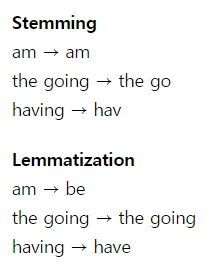

## 텍스트 토큰화

### 문장 토큰화

In [39]:
import nltk 
from nltk import sent_tokenize

nltk.download('punkt') #마침표, 개행문자(\n 등) 등의 데이터셋 다운

text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
               You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text=text_sample)
print(type(sentences),len(sentences))
print(sentences)

<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hyunjung\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [40]:
import kss

text='딥러닝 자연어 처리가 재미있기는 합니다. 그런데 문제는 영어보다 한국어로 할 때 너무 어려워요. 농담아니에요 이제 해보면 알걸요?'
print(kss.split_sentences(text))

['딥러닝 자연어 처리가 재미있기는 합니다.', '그런데 문제는 영어보다 한국어로 할 때 너무 어려워요.', '농담아니에요', '이제 해보면 알걸요?']


### 단어 토큰화

기본적으로 공백, 콤마, 개행문자 등으로 단어를 분리

In [48]:
from nltk import word_tokenize

sentence = "The Matrix is everywhere its all around us, here even in this room. Let's find it"
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 19
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.', 'Let', "'s", 'find', 'it']


<문장 + 단어 토큰화>

In [3]:
from nltk import word_tokenize, sent_tokenize

#여러개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화 만드는 함수 생성
def tokenize_text(text):
    
    # 문장별로 분리 토큰
    sentences = sent_tokenize(text)
    # 분리된 문장별 단어 토큰화
    word_tokens = [word_tokenize(sentence) for sentence in sentences]
    return word_tokens

#여러 문장들에 대해 문장별 단어 토큰화 수행. 
word_tokens = tokenize_text(text_sample)
print(type(word_tokens),len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


서로 붙어있는 단어들 사이의 문맥적인 의미는 무시됨. => n-gram으로 근접한 n개의 단어끼리 묶어서 분리하는 방법 고안

In [14]:
from konlpy.tag import Okt  
okt=Okt()
print(okt.morphs("ESAA OB 3조 짱짱 멋쟁이들~~~~"))

['ESAA', 'OB', '3조', '짱짱', '멋쟁이', '들', '~~~~']


In [17]:
from eunjeon import Mecab
mecab=Mecab()
print(mecab.pos("ESAA OB 3조 짱짱 멋쟁이들~~~~"))  

[('ESAA', 'SL'), ('OB', 'SL'), ('3', 'SN'), ('조', 'NNG'), ('짱짱', 'MAG'), ('멋쟁이', 'NNG'), ('들', 'XSN'), ('~~~~', 'SY')]


[mecab 품사 태그](https://openuiz.tistory.com/90)

## stop word 제거

분석에 큰 의미가 없는 제거. 의미가 없지만 빈도가 높아 제거하지 않으면 중요한 단어로 인식할 수 있음

In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hyunjung\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
print('영어 stop words 갯수:',len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 갯수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [36]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []
# 위 예제의 3개의 문장별로 얻은 word_tokens list 에 대해 stop word 제거 Loop
for sentence in word_tokens:
    filtered_words=[]
    # 개별 문장별로 tokenize된 sentence list에 대해 stop word 제거 Loop
    for word in sentence:
        #소문자로 모두 변환합니다. 
        word = word.lower()
        # tokenize 된 개별 word가 stop words 들의 단어에 포함되지 않으면 word_tokens에 추가
        if word not in stopwords:
            filtered_words.append(word)
    all_tokens.append(filtered_words)

print(word_tokens, '\n')
print(all_tokens)

[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']] 

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


## Stemming과 Lemmatization

단어의 원형을 찾음
- Lemmatization이 더 의미적인 부분을 고려함

In [7]:
## Stemmeing
from nltk.stem import LancasterStemmer
stemmer = LancasterStbemmer()

print(stemmer.stem('working'),stemmer.stem('works'),stemmer.stem('worked'))
print(stemmer.stem('amusing'),stemmer.stem('amuses'),stemmer.stem('amused'))
print(stemmer.stem('happier'),stemmer.stem('happiest'))
print(stemmer.stem('fancier'),stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


정확도 떨어짐

In [61]:
## Lammatization
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemma = WordNetLemmatizer() # 품사 입력
print(lemma.lemmatize('amusing','v'),lemma.lemmatize('amuses','v'),lemma.lemmatize('amused','v'))
print(lemma.lemmatize('happier','a'),lemma.lemmatize('happiest','a'))
print(lemma.lemmatize('fancier','a'),lemma.lemmatize('fanciest','a'))

amuse amuse amuse
happy happy
fancy fancy


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hyunjung\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


정확도 더 높음